## EDA Skin Cancer Lesions

### Importing Libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from glob import glob
np.random.seed(7)
from sklearn.preprocessing import StandardScaler
import itertools
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [67]:
df = pd.read_csv('/kaggle/input/skin-cancer-lesions-inzip/HAM10000_metadata.csv')

In [68]:
df.head(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


### Checking Null Values

In [70]:
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [71]:
df.dropna(subset=['age'], inplace=True)

## Value Counts of each class

In [72]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print("---------------------------")

lesion_id
lesion_id
HAM_0000835    6
HAM_0003789    6
HAM_0005263    6
HAM_0001863    6
HAM_0007367    5
              ..
HAM_0006133    1
HAM_0002977    1
HAM_0005839    1
HAM_0006710    1
HAM_0006141    1
Name: count, Length: 7418, dtype: int64
---------------------------
image_id
image_id
ISIC_0027419    1
ISIC_0031892    1
ISIC_0027368    1
ISIC_0028004    1
ISIC_0026031    1
               ..
ISIC_0025558    1
ISIC_0026520    1
ISIC_0028007    1
ISIC_0024692    1
ISIC_0032258    1
Name: count, Length: 9958, dtype: int64
---------------------------
dx
dx
nv       6660
mel      1111
bkl      1089
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64
---------------------------
dx_type
dx_type
histo        5332
follow_up    3704
consensus     853
confocal       69
Name: count, dtype: int64
---------------------------
age
age
45.0    1299
50.0    1187
55.0    1009
40.0     985
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.

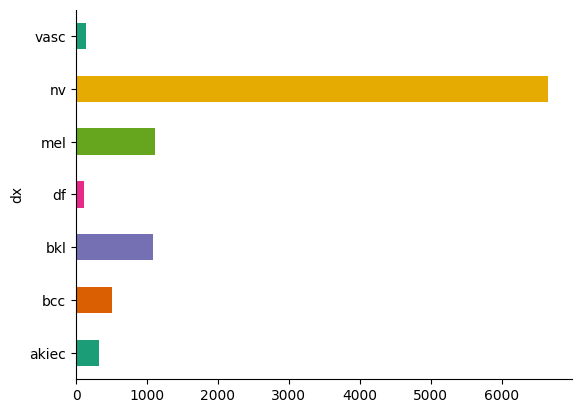

In [73]:
# @title dx
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('dx').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [74]:
## After making barh graph between differnet classes we found most of the data avaliable is of Vasc


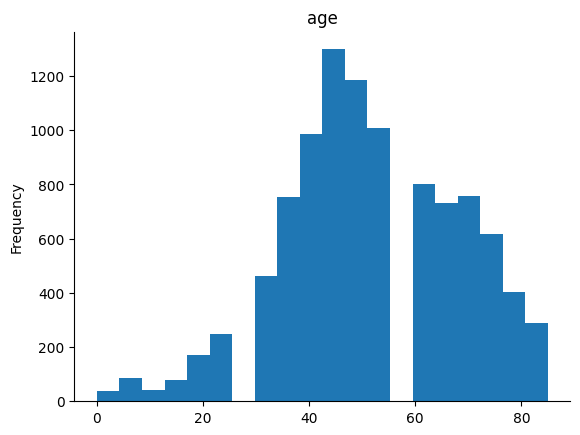

In [75]:
# @title age

from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [76]:
##3 after making unvariate analysis on Age colum we found the most of the ages are between 30 to 50 years of age

#### Removing rows having Age 0

In [77]:
df = df[df['age'] != 0]

In [78]:
x= pd.DataFrame(df)

In [79]:
x.describe(include = 'all')

,lesion_id,image_id,dx,dx_type,age,sex,localization
count,9919,9919,9919,9919,9919.000000,9919,9919
unique,7397,9919,7,4,NaN,3,15
top,HAM_0000835,ISIC_0027419,nv,histo,NaN,male,back
freq,6,1,6630,5322,NaN,5377,2185
mean,NaN,NaN,NaN,NaN,52.067749,NaN,NaN
std,NaN,NaN,NaN,NaN,16.686741,NaN,NaN
min,NaN,NaN,NaN,NaN,5.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,50.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,65.000000,NaN,NaN


In [80]:
df.describe()

,age
count,9919.000000
mean,52.067749
std,16.686741
min,5.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


### Removing rows having Sex == 'Unknown'

In [81]:
df = df[df['sex'] != 'unknown']

In [82]:
df['sex'].value_counts()

sex
male      5377
female    4534
Name: count, dtype: int64

In [83]:
df.shape

(9911, 7)

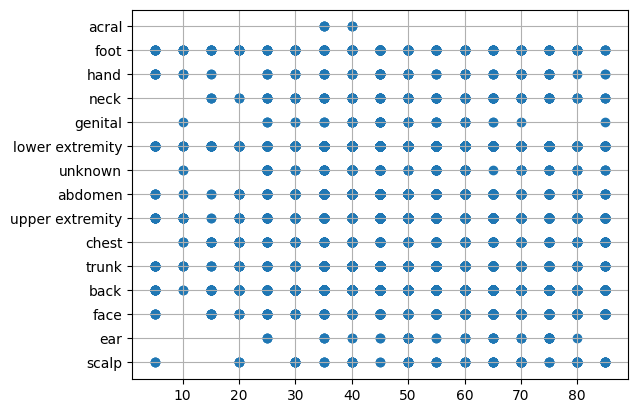

In [84]:
plt.grid()
plt.scatter(df['age'],df['localization'])

In [85]:
# Get a boolean Series or DataFrame based on whether self elements are duplicated or not
duplicated_values = df.duplicated(subset=['lesion_id'])

In [86]:
# Filter out the duplicated values
duplicated_df = df[duplicated_values]

# Count the number of duplicates
count = duplicated_df.shape[0]


In [87]:
print("Number of duplicates in lesion_id:", count)

Number of duplicates in lesion_id: 2517


### Removing these duplicate values

In [88]:
df.drop_duplicates(subset=['lesion_id'],inplace=True)

In [89]:
df.shape

(7394, 7)

In [90]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back


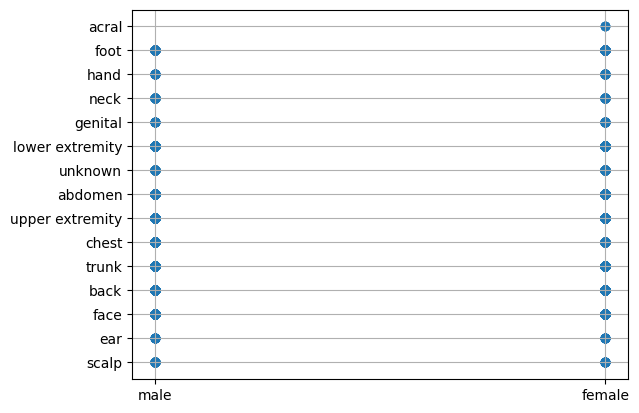

In [94]:
plt.grid()
plt.scatter(df['sex'],df['localization'])
# sns.catplot(data=df, kind="swarm", x="sex", y="localization", hue="image_id",height = 5,aspect = 0.5)


In [95]:
df['sex'].value_counts()

sex
male      3986
female    3408
Name: count, dtype: int64

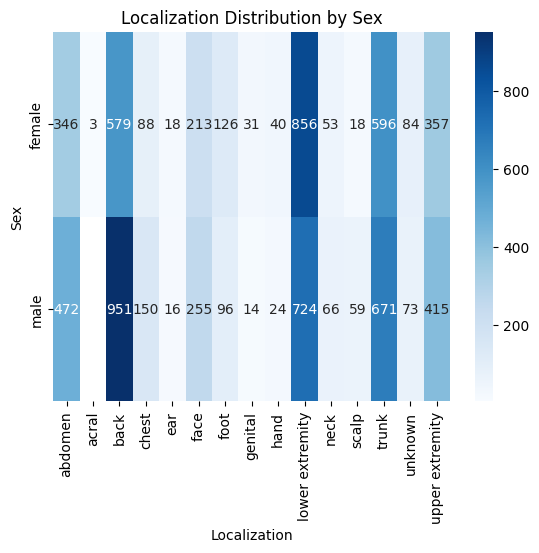

In [96]:
import seaborn as sns
pivot_data = df.pivot_table(index='sex', columns='localization', aggfunc='size')
sns.heatmap(pivot_data, cmap='Blues', annot=True, fmt='g')
plt.xlabel('Localization')
plt.ylabel('Sex')
plt.title('Localization Distribution by Sex')
plt.show()

In [97]:
df[df['sex']=='female']['localization'].value_counts()

localization
lower extremity    856
trunk              596
back               579
upper extremity    357
abdomen            346
face               213
foot               126
chest               88
unknown             84
neck                53
hand                40
genital             31
scalp               18
ear                 18
acral                3
Name: count, dtype: int64

In [98]:
df[df['sex']=='male']['localization'].value_counts()

localization
back               951
lower extremity    724
trunk              671
abdomen            472
upper extremity    415
face               255
chest              150
foot                96
unknown             73
neck                66
scalp               59
hand                24
ear                 16
genital             14
Name: count, dtype: int64

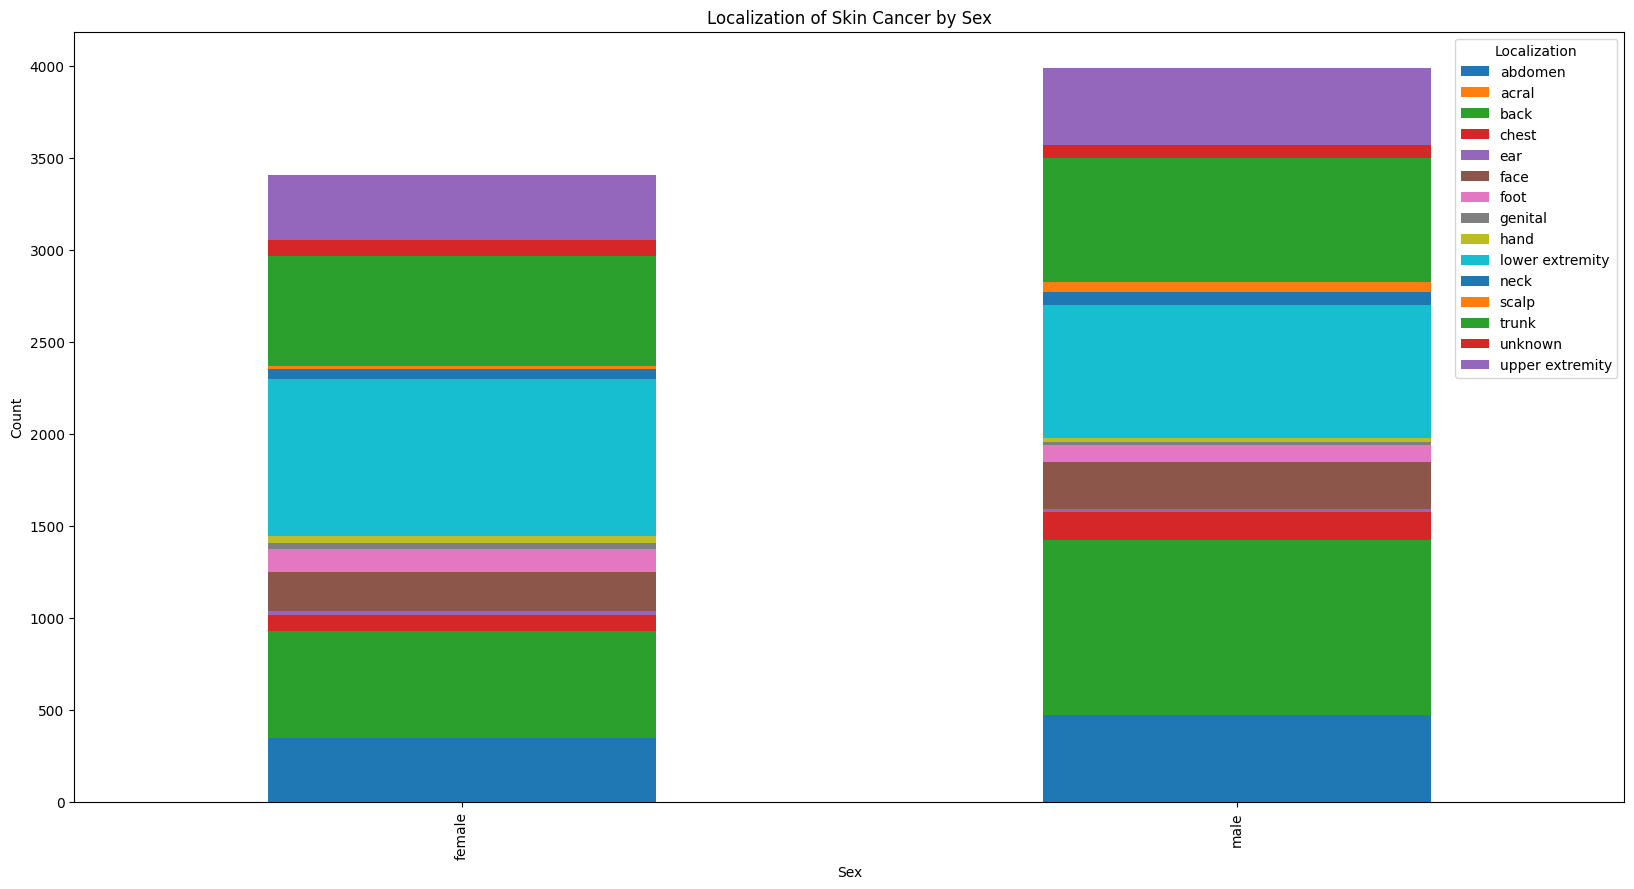

In [99]:
grouped_data = df.groupby(['sex', 'localization']).size().unstack()
grouped_data.plot(kind='bar', stacked=True,figsize = (20,10))
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Localization of Skin Cancer by Sex')
plt.legend(title='Localization')
plt.show()

# from the above result we conclude that the back is the part of the body where most of the people is affected by the skin cancer

In [100]:
df['localization'].value_counts()

localization
lower extremity    1580
back               1530
trunk              1267
abdomen             818
upper extremity     772
face                468
chest               238
foot                222
unknown             157
neck                119
scalp                77
hand                 64
genital              45
ear                  34
acral                 3
Name: count, dtype: int64

In [101]:
male = (df['sex'] == 'male').astype(int)

In [102]:
female = (df['sex'] == 'female').astype(int)

In [103]:
name_df=['Male','Female']


In [104]:
df_gen=[male,female]

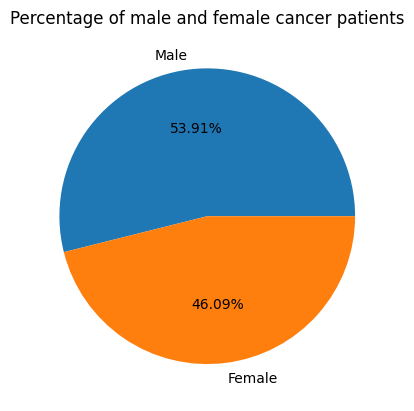

In [105]:
gender = [len(df[df['sex'] == 'male']), len(df[df['sex'] == 'female'])]
mylabels = ["Male", "Female"]
plt.pie(gender, labels=mylabels, autopct="%.2f%%")
plt.title("Percentage of male and female cancer patients")
plt.show()

#from the above visualisation we can conclude that the male get cancer i.e 54.47 more than the female i,e 45.53

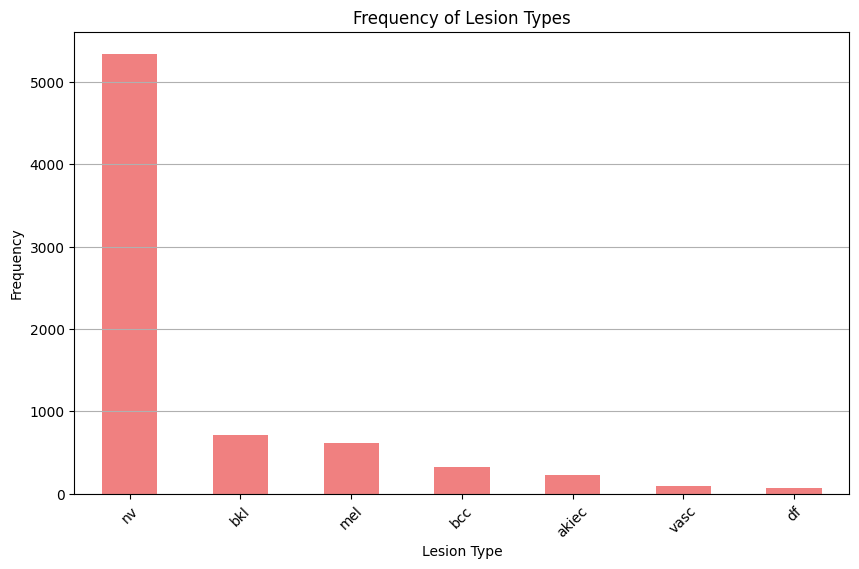

In [106]:
plt.figure(figsize=(10, 6))
df['dx'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Frequency of Lesion Types')
plt.xlabel('Lesion Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

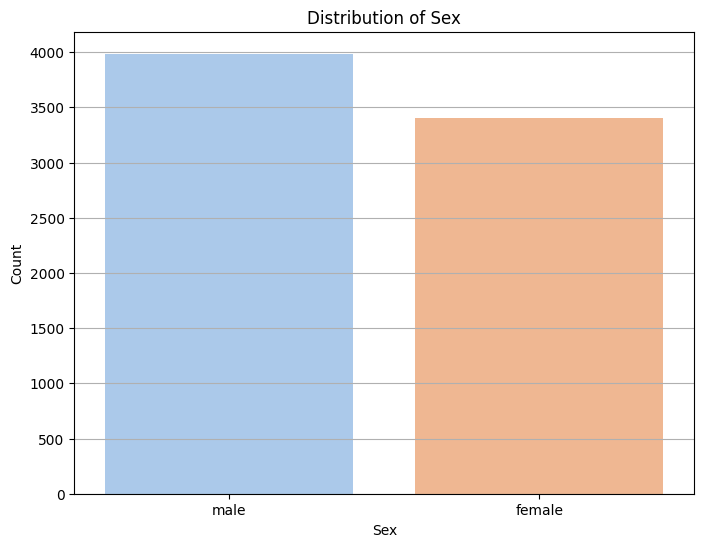

In [107]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df, palette='pastel')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

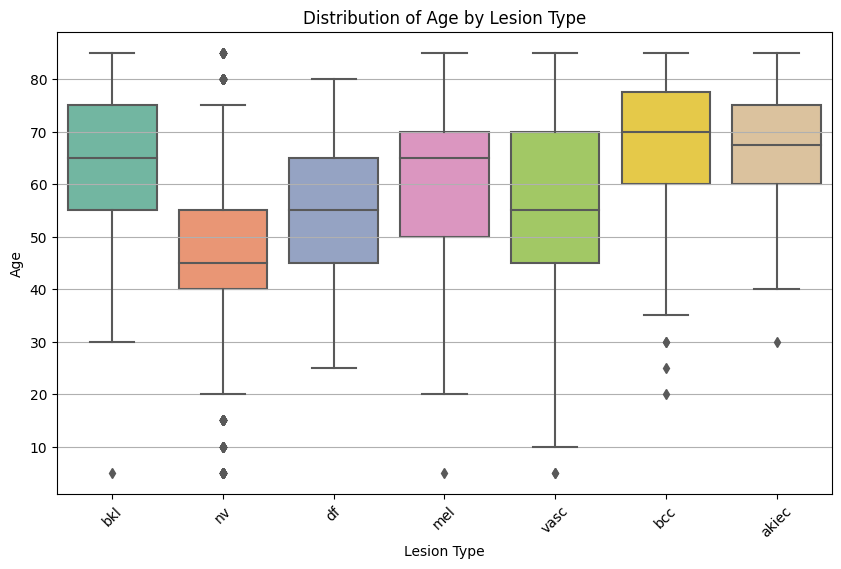

In [108]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='dx', y='age', data=df, palette='Set2')
plt.title('Distribution of Age by Lesion Type')
plt.xlabel('Lesion Type')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
# I also made box plot for the different lesion type which shows the information in boxplot about differnt lesion typw and ages